In [883]:
#For Data Wrangling
import pandas as pd
import os as o
import numpy as np

#For Data Visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#For dates
import datetime as dt
from matplotlib.dates import DateFormatter

#text
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

#for Statistical
from scipy.stats import ttest_ind


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
path = path = 'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\'
o.chdir(path)

In [393]:
trans = pd.read_csv('./Forage Project/QVI_transaction_data.csv')
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [289]:
cust = pd.read_csv('./Forage Project/QVI_purchase_behaviour.csv')
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [396]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [402]:
trans['DATE'] = pd.TimedeltaIndex(trans['DATE'], unit='d') + dt.datetime(1899, 12, 30)

In [29]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [179]:
trans.shape

(264836, 8)

In [403]:
trans['TXN_ID'].nunique()

263127

In [404]:
trans[trans.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [405]:
cust.shape

(72636, 3)

In [406]:
trans.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [407]:
cust.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [408]:
A.shape

(74570, 8)

In [409]:
B = trans.loc[~trans['PROD_NAME'].str.contains('Chips | Chip', na=False)]
B.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [68]:
B.shape

(190266, 8)

In [185]:
t = trans

In [187]:
t['Prod_Size'] = trans['PROD_NAME'].str.extract("(\d+)")
t.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Prod_Size
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175


In [410]:
trans['PROD_SIZE'] = [re.search(r"[0-9]+(g|G)", i).group(0).replace('G','g') for i in trans['PROD_NAME']]
trans.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [ ]:
# replace & with space and remove multiple spaces
Transaction_Data.PROD_NAME = [" ".join(i.replace('&',' ').split()) for i in Transaction_Data.PROD_NAME]
# remove digits that are followed by grams
Transaction_Data.PROD_NAME = [re.sub(r"\s*[0-9]+(g|G)", r"", i) for i in Transaction_Data.PROD_NAME]

In [411]:
def clean_text(ct):
    ct= re.sub('/', ' ', ct)# remove & and /
    ct = re.sub('&', ' ', ct)
    ct = re.sub('\d\w*', ' ', ct)# remove numbers
    return ct

In [412]:
trans['PROD_NAME'] = trans['PROD_NAME'].apply(clean_text)
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g


In [413]:
#Split each words 
splitwords = trans['PROD_NAME']
string = ' '.join((splitwords))
prodname = word_tokenize(string)

In [705]:
frequency =fdist(prodname)
keywords = pd.DataFrame(list(frequency.items()), columns = ['Word', 'Frequency']).sort_values('Frequency', ascending=False)
keywords.head(10)

,Word,Frequency
10,Chips,49770
16,Kettle,41288
7,Smiths,28860
28,Salt,27976
6,Cheese,27890
66,Pringles,25102
34,Doritos,24962
8,Crinkle,23960
35,Corn,22063
48,Original,21560


In [440]:
trans['PROD_NAME'] = trans['PROD_NAME'].apply(lambda x: x.lower())
trans = trans[~trans['PROD_NAME'].str.contains("salsa")]
trans['PROD_NAME'] = trans['PROD_NAME'].apply(lambda x: x.title())
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150g


In [443]:
#There is a visible outlier 

trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [442]:
#Accessing the customers transaction
trans.loc[trans['PROD_QTY'] == 200]
#drop Data
trans = trans[trans['PROD_QTY'] < 200]

In [444]:
#Check & drop ourlier in customer Data
cust.loc[cust['LYLTY_CARD_NBR'] == 226000]
cust= cust.loc[cust['LYLTY_CARD_NBR'] != 226000]

In [460]:
# Create a new dataframe which contains the total sale for each date
transdate2 = pd.pivot_table(trans, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
#transdate2 = trans.groupby('DATE').agg({'TOT_SALES': 'sum'}).reset_index()
transdate2.head(3)

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7


In [462]:
transdate2.count().unique()

array([364], dtype=int64)

In [464]:
#one date is missing, it ought to be 365 days. Check which date is missing
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(trans['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
#No Sales was recorded on xmas day, which is understandable

In [504]:
newdate = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
newdate['TOT_SALES'] = 0
len(newdate)
newdate.head(3)

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0


In [529]:
alltrans = transdate2+newdate #add two dataframes to include the missing date
alltrans.loc[alltrans['TOT_SALES'].isna()] #To check null values, expected that 2018-12-25 will have a NaN value
alltrans.fillna(0, inplace = True) # change every NA to 0
alltrans.index.name = 'Date' #To name the first column
alltrans.head()

,TOT_SALES
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [530]:
alltrans.loc[alltrans['TOT_SALES']== 0]

,TOT_SALES
Date,
2018-12-25,0.0


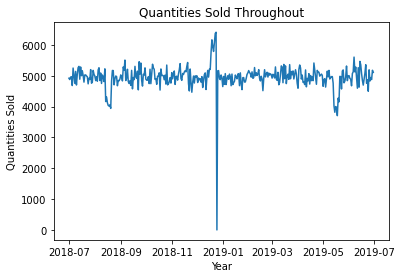

In [542]:
#Year = alltrans['Date'].unique()

plt.plot(alltrans)
plt.title('Quantities Sold Throughout')
plt.ylabel('Quantities Sold')
plt.xlabel('Year')

plt.show()


,DATE,PROD_QTY
0,2018-07-01,1273
1,2018-07-02,1251
2,2018-07-03,1296


In [621]:
transdate = trans.groupby('DATE').agg({'TOT_SALES': 'sum'}).reset_index() #Create a date dataframe
DecTrans = transdate[transdate['DATE'].isin(pd.date_range(start="2018-12-01",end="2018-12-31").tolist())]
# fill in missing dec date and add 0
DecTrans = transdate.set_index('DATE').reindex(pd.date_range(start="2018-12-01",end="2018-12-31"), fill_value=0)

#or
DecTrans2 = alltrans[(alltrans.index < "2019-01-01") & (alltrans.index > "2018-11-30")]
DecTrans2

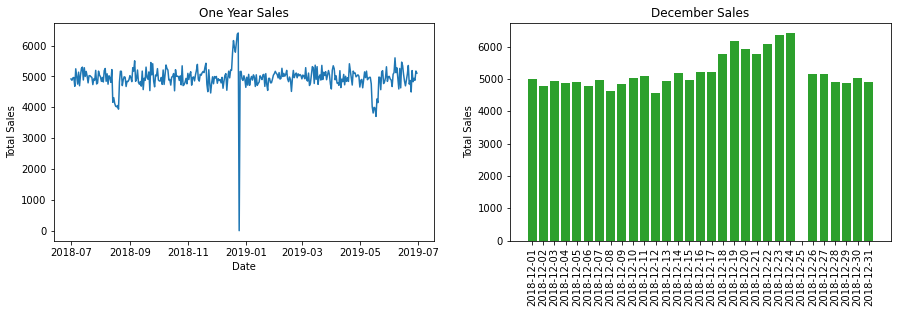

In [644]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.lineplot(x="Date", y="TOT_SALES", data=alltrans, ax=ax1)
plt.ylabel('Total Sales')
plt.title('One Year Sales')


ax2=plt.subplot(122)
ax2.bar(DecTrans2.index, DecTrans['TOT_SALES'],color='#2ca02c')
ax2.set_xticks(DecTrans.index)

ax2.tick_params(axis='x', rotation=90) 
plt.ylabel('Total Sales')
plt.title('December Sales')
plt.show()


### Quantity Sold by Product Size

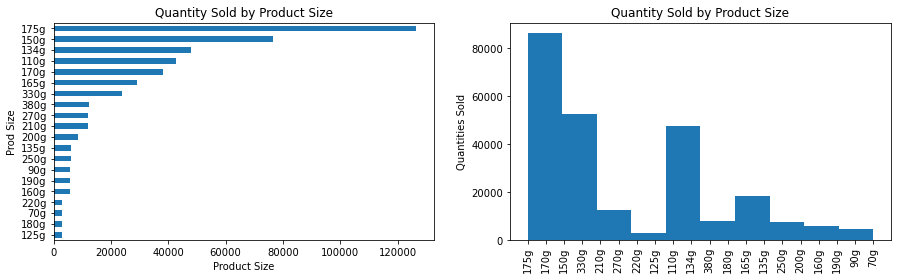

In [703]:
#product quantity Sold per size 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
SalesSize = trans.groupby('PROD_SIZE').agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').reset_index().plot.barh(x='PROD_SIZE', legend=False, ax=ax1)
ax1.set_ylabel('Prod Size')
ax1.set_xlabel('Quantities Sold')
plt.title('Quantity Sold by Product Size')


ax2=plt.subplot(122)
plt.hist(trans['PROD_SIZE'])
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Quantities Sold')
ax1.set_xlabel('Product Size')
plt.title('Quantity Sold by Product Size')
plt.show()



### Keyword and 

In [750]:
trans['BRAND'] = trans['PROD_NAME'].str.split(' ').str[0]
#transactionData['BRAND'] = part[0]
trans.head(20)
trans['BRAND'].unique()
#trans.groupby('BRAND').agg({'BRAND': 'count'})

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [727]:
trans['BRAND'].replace('Ncc', 'Natural', inplace = True)
trans['BRAND'].replace('Ccs', 'CCS', inplace = True)
trans['BRAND'].replace('Smith', 'Smiths', inplace = True)
trans['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
trans['BRAND'].replace('Dorito', 'Doritos', inplace = True)
trans['BRAND'].replace('Ww', 'Woolworths', inplace = True)
trans['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
trans['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
trans['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

In [776]:
topbrands= trans.groupby('BRAND').agg({'TOT_SALES': 'sum'})
topbrands.index.name = 'Brand'
topbrands= topbrands.sort_values('TOT_SALES', ascending = False).head(10)

,TOT_SALES
Brand,
Kettle,390239.8
Smiths,202908.6
Doritos,187277.9
Pringles,177655.5
Thins,88852.5
Twisties,81522.1
Tostitos,79789.6
Infuzions,76247.6
Cobs,70569.8


In [771]:
keywords.head()

,Word,Frequency
10,Chips,49770
16,Kettle,41288
7,Smiths,28860
28,Salt,27976
6,Cheese,27890


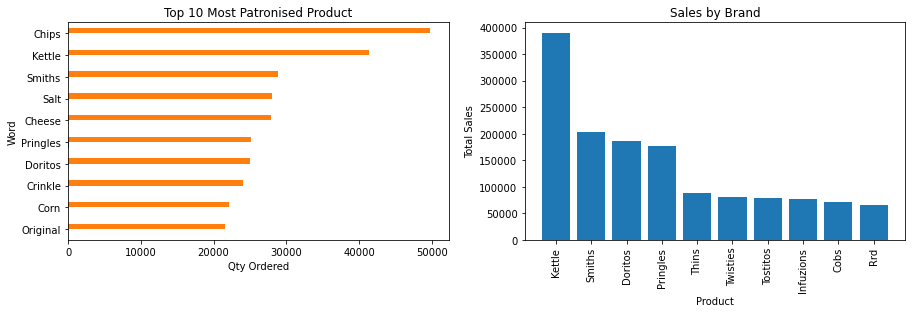

In [851]:
#Top 10 key words

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
keywords.head(10).sort_values('Frequency').reset_index().plot.barh(x='Word', legend=False, ax = ax1)
ax2.set_ylabel('Product')
ax1.set_xlabel('Qty Ordered')
plt.title('Top 10 Most Patronised Product')


ax2=plt.subplot(122)
plt.bar(topbrands.index, topbrands['TOT_SALES'])
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Product')
plt.title('Sales by Brand')
plt.show()

### Customer Data

In [839]:
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [977]:
cinfo = cust.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', 
                        aggfunc=len, fill_value=0)
cinfo

LYLTY_CARD_NBR                   
PREMIUM_CUSTOMER               Budget Mainstream Premium
LIFESTAGE                                               
MIDAGE SINGLES/COUPLES           1504       3340    2431
NEW FAMILIES                     1112        849     588
OLDER FAMILIES                   4675       2831    2273
OLDER SINGLES/COUPLES            4929       4930    4750
RETIREES                         4454       6479    3872
YOUNG FAMILIES                   4017       2728    2433
YOUNG SINGLES/COUPLES            3779       8088    2574

### Combine Trans and Customer Data

Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is
How many customers are in each segment
How many chips are bought per customer by segment
What is the average chip price by customer segment

In [845]:
fulldata = pd.merge(trans, cust, how= 'left', on = 'LYLTY_CARD_NBR')
fulldata.shape

(246740, 12)

In [849]:
fulldata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175g,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [1152]:
premium = cust.groupby('PREMIUM_CUSTOMER')["LYLTY_CARD_NBR"].count().sort_values(ascending=False)
lifestage = cust.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].count().sort_values(ascending=False)
premium

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18921
Name: LYLTY_CARD_NBR, dtype: int64

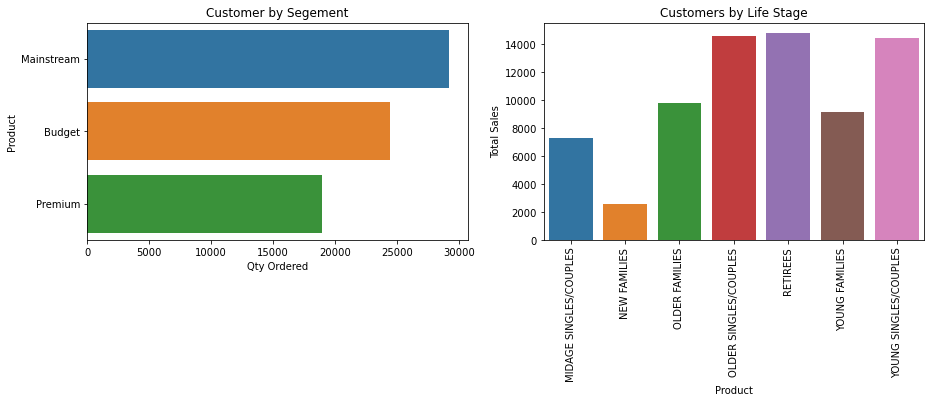

In [1153]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.countplot(y=cust['PREMIUM_CUSTOMER'], order = cust['PREMIUM_CUSTOMER'].value_counts().index)
ax1.set_ylabel('Product')
ax1.set_xlabel('Qty Ordered')
plt.title('Customer by Segement')


ax2=plt.subplot(122)
sns.countplot(cust['LIFESTAGE'], order =cust.groupby('LIFESTAGE').count().index)
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Product')
plt.title('Customers by Life Stage')
plt.show()

### Data analysis on customer segments

Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is
How many customers are in each segment
How many chips are bought per customer by segment
What is the average chip price by customer segment

In [1048]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE
salesbysegment = fulldata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False)
salesbysegment.head()

,,TOT_SALES
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,156863.75
YOUNG SINGLES/COUPLES,Mainstream,147582.20
RETIREES,Mainstream,145168.95
YOUNG FAMILIES,Budget,129717.95
OLDER SINGLES/COUPLES,Budget,127833.60


In [1205]:
highestrevbySegement= fulldata.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].agg(["mean", "sum"])
highestrevbySegement.rename(columns = {'mean': 'Avr Rev', 'sum': 'Total Rev'}, inplace = True)
highestrevbySegement.sort_values(ascending=False, by="Total Rev").head()

,Avr Rev,Total Rev
PREMIUM_CUSTOMER,,
Mainstream,7.374193,700865.40
Budget,7.277458,631406.85
Premium,7.282751,472905.45


In [1206]:
highestrevbycategory= fulldata.groupby('LIFESTAGE')['TOT_SALES'].agg(["mean", "sum"])
highestrevbycategory.rename(columns = {'mean': 'Avr Rev', 'sum': 'Total Rev'}, inplace = True)
highestrevbycategory.sort_values(ascending=False, by="Total Rev").head()

,Avr Rev,Total Rev
LIFESTAGE,,
OLDER SINGLES/COUPLES,7.402982,376019.65
RETIREES,7.373994,342381.90
OLDER FAMILIES,7.274899,328519.90
YOUNG FAMILIES,7.275841,294627.90
YOUNG SINGLES/COUPLES,7.175854,243756.60


In [1214]:
#Brand Contributuin the most Revenue
RevbyBrand = fulldata.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRAND"].agg(pd.Series.mode).sort_values()
RevbyBrand.head()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
Name: BRAND, dtype: object

### Main Stream Customers and Older Singles/Couples contribute the highest Revenue

In [1164]:
# Total unique customer by PREMIUM_CUSTOMER and LIFESTAGE
custbysegement = pd.DataFrame(fulldata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())
custbysegement.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
custbysegement.sort_values('Number of Customers', ascending = False).head()

Number of Customers
LIFESTAGE             PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES Mainstream                       7917
RETIREES              Mainstream                       6358
OLDER SINGLES/COUPLES Mainstream                       4858
                      Budget                           4849
                      Premium                          4682

In [1167]:
uniquesalesbysegement = pd.DataFrame(fulldata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())
uniquesalesbysegement.head()

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1474
                       Mainstream                  3298
                       Premium                     2369
NEW FAMILIES           Budget                      1087
                       Mainstream                   830

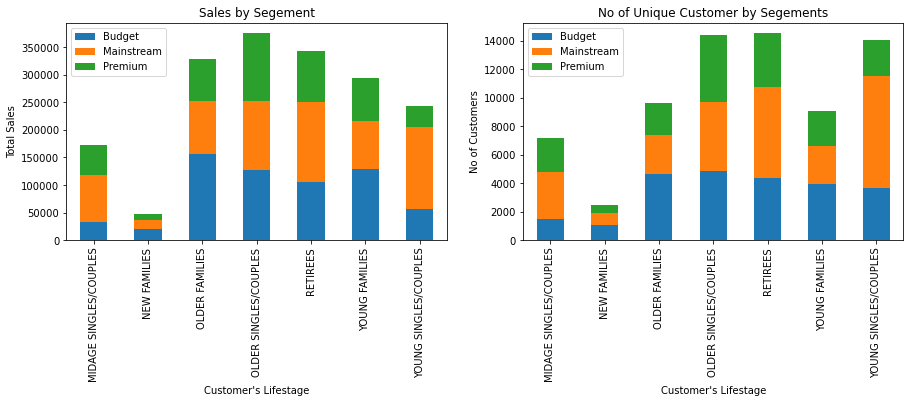

In [1168]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
salesbysegment.unstack().plot(kind = 'bar', stacked = True,   ax=ax1)
ax1.set_ylabel('Total Sales')
ax1.set_xlabel("Customer's Lifestage")
ax1.set_title( 'Sales by Segement')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

ax2=plt.subplot(122)
custbysegement.unstack().plot(kind = 'bar', stacked = True,   ax=ax2)
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('No of Customers')
ax2.set_xlabel("Customer's Lifestage")
ax2.set_title('No of Unique Customer by Segements')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

### The top 3 total sales contributor segment are (in order):

Older families (Budget) \$156,864

Young Singles/Couples (Mainstream) \$147,582

Retirees (Mainstream) \$145,169

There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these segments however this is not the major driver for the budget older families segment.

The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:

High Frequency of Purchase and,
Average Sales per Customer compared to the other segment.

In [1170]:
freq_per_cust = fulldata.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean").head()

mean  count
LIFESTAGE      PREMIUM_CUSTOMER                 
OLDER FAMILIES Mainstream        4.749283   2788
               Budget            4.665799   4611
               Premium           4.662931   2231
YOUNG FAMILIES Premium           4.497081   2398
               Budget            4.493549   3953

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:

High Frequency of Purchase and,
Fairly high unique number of customer in the segment

In [1146]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


In [1203]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [1216]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = fulldata

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.0
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175g,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.1


In [1217]:
# Let's group our data into mainstream and non-mainstream

mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price per Unit')

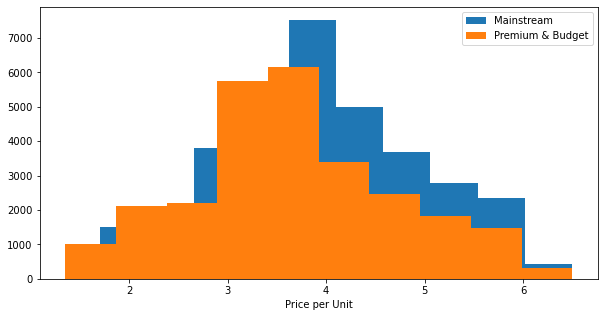

In [1218]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [1219]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream average price per unit: $4.04
Non-mainstream average price per unit: $3.71
Mainstream customers have higher average price per unit. 


In [1220]:
# Perform t-test 

ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

Mainstream customers have higher average price per unit than that of non-mainstream customers.

We have found quite a few interesting insights that we can dive deeper into. For example, we might want to target customers segments that contribute the most to sales to retain them to further increase sales. Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips.

In [1230]:
target = fulldata.loc[(fulldata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (fulldata['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = fulldata.loc[(fulldata['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (fulldata['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-14,1,1291,333,27,Ww Supreme Cheese Corn Chips,1,1.9,200g,Ww,YOUNG SINGLES/COUPLES,Mainstream,1.9
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag,1,5.9,380g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour,1,3.7,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


### Afinity to Brand

In [1236]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [1237]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
Ccs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [1232]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False).head()

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Dorito,0.015707,0.012859,1.221477
Twisties,0.046184,0.037933,1.217506
Doritos,0.107053,0.088312,1.212220
Kettle,0.197985,0.166560,1.188667


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

### Afinity Pack Size

In [ ]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [1235]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

NameError: name 'targetSize' is not defined

In [ ]:

Conclusion
Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
(Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population

In [ ]:
Insights:
Top 3 total sales contributor segment are

Older families (Budget) \$156,864
Young Singles/Couples (Mainstream) \$147,582
Retirees (Mainstream) \$145,169
Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
Chips brand Kettle is dominating every segment as the most purchased brand.
Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.
Reccomendations:
Older Families:
Focus on the Budget segment.
Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase.
Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.
Young Singles/Couples:
Focus on the Mainstream segment.
This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment.
Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.
Retirees:
Focus on the Mainstream segment.
Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
General:
All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
When promoting chips in general to all segments it is good to take advantage of these two points.